In [66]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

loading the dataset

In [67]:
house_df = pd.read_csv('C:/Users/lekshmi/Downloads/HousePricePrediction.xlsx - Sheet1.csv')

In [68]:
house_df.shape

(2919, 13)

2919 rows and 13 columns

In [69]:
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


#### Data Pre processing

In [70]:
house_df.drop_duplicates(inplace=True)

In [71]:
house_df.shape

(2919, 13)

no duplicates are recorded

In [72]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [73]:
house_df.drop(columns = ['Id'], inplace = True) # As 'id' column is unnecessary

##### checking for null values

In [74]:

house_df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

some null values are recorded. Hence imputation technique is used for sales price column and for the rest, it is filled with zero

In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(house_df[['SalePrice']])

SimpleImputer()

In [76]:

imputer.statistics_ # mean

array([180921.19589041])

In [77]:
house_df['SalePrice'] = imputer.transform(house_df[['SalePrice']])

In [78]:
house_df = house_df.fillna(0)

In [79]:
house_df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

all the null values are handled

In [80]:
house_df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


#### outlier detection

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
sns.set_style('darkgrid')

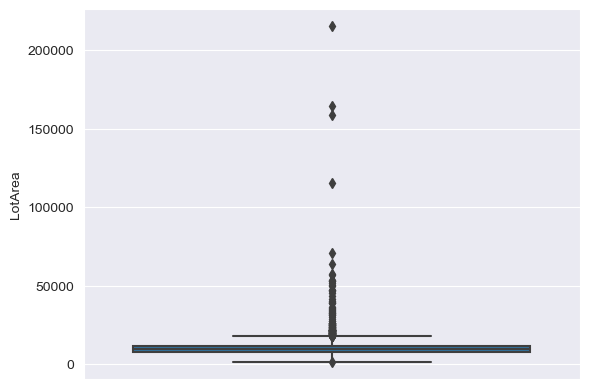

In [83]:
sns.boxplot(house_df, y = 'LotArea');

outliers are detected

#### outlier handling

In [84]:
import numpy as np

Q1 = np.percentile(house_df['LotArea'], 25, interpolation = 'midpoint') # first 25% of data
Q3 = np.percentile(house_df['LotArea'], 75, interpolation = 'midpoint') #75 % of data

IQR = Q3 - Q1

In [85]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

In [86]:
df = house_df[(house_df.LotArea < upperBound) & (house_df.LotArea > lowerBound)]

In [87]:
df.shape

(2791, 12)

In [88]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


the outlier values have been removed

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


In [90]:

df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', 0], dtype=object)

##### as some columns contain categorical values and some numerical, we have to adjust the values

In [91]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [92]:
cat_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [93]:
df[cat_cols] = df[cat_cols].astype(str)


#### OneHotEncoding

In [94]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse= False, handle_unknown='ignore')

encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [95]:
encoded_cols = encoder.get_feature_names_out(cat_cols)

In [96]:
encoded_cols

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [97]:
df[encoded_cols] = encoder.transform(df[cat_cols])

In [98]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.drop(columns=cat_cols, inplace=True)

In [100]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_0,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,1526,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separation into independent and dependent variables

In [101]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_0',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [121]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [122]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_0,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,1526,5,1970,1970,0.0,546.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,1936,7,1970,1970,0.0,546.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### as the values in different columns have different scales, it is necessary to bring them to a standard scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

MinMaxScaler()

In [105]:
X[:] = scaler.transform(X)

In [106]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_0,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.430838,0.500,0.949275,0.883333,0.0,0.266999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.501821,0.875,0.753623,0.433333,0.0,0.393637,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.603666,0.500,0.934783,0.866667,0.0,0.286962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.498735,0.500,0.311594,0.333333,0.0,0.235808,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.789457,0.500,0.927536,0.833333,0.0,0.357143,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.823529,0.003457,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,0.823529,0.028764,0.750,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.823529,0.026171,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,0.382353,0.553731,0.500,0.869565,0.700000,0.0,0.284467,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting into training and test data

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [204]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 38), (559, 38), (2232,), (559,))

#### importing linear regression model

In [205]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred = model.predict(X_test)

In [207]:
y_test[:5]

2272    180921.19589
1060    213500.00000
2182    180921.19589
1268    381000.00000
2782    180921.19589
Name: SalePrice, dtype: float64

In [208]:
y_pred[:5]

array([182604.33207739, 189636.78144702, 202395.73183661, 196977.86382891,
       139023.10089291])

#### evaluation of model

In [209]:
from sklearn.metrics import mean_absolute_error

In [210]:
mean_absolute_error(y_test, y_pred)

32690.00634743156

##### regularisation of model to improve the mean absolute error

In [259]:

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=20, max_iter=100, tol = 0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=20, max_iter=200, tol=0.1)

In [260]:

lasso_pred = lasso_reg.predict(X_test)

In [261]:
mean_absolute_error(y_test, lasso_pred)

32573.215872117675

In [265]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [266]:
ridge_pred = ridge_reg.predict(X_test)

In [267]:
mean_absolute_error(y_test, ridge_pred)

32784.054095458036